In [1]:
# Required packages (general)
from cokenet_model import CokeModel
from matplotlib.image import imread
from utilities import compute_accuracy_labelwise

# Required packages (demo-specific)
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
%load_ext autoreload
%autoreload 2

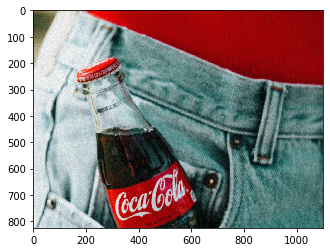

In [3]:
# Prediction from single image variable
image_path = 'dataset/temp_coke/5a86e60cd0307215038b4797.jpg'
im = imread(image_path)
plt.imshow(im)

In [4]:
# Loading the cokenet module
model = CokeModel()

[1]


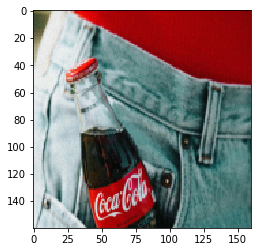

In [5]:
# Making predictions for a single image variable
model.load_image(im)
predicted, im_ret = model.evaluate()
print (predicted) # 0: Not Coke, 1: Coke
plt.imshow(im_ret)

In [6]:
# Resizing single files
import cv2
import os
import numpy as np

def resize_image_single(im, output_shape=160):
    resized = cv2.resize(im, (output_shape, output_shape), interpolation=cv2.INTER_AREA)
    resized[resized<0] = 0
    if resized.shape == (output_shape, output_shape, 4):
        resized = resized[:, :, :3]
    return resized

In [7]:
# Prediction from multiple image variable
max_files = 5
base_path = 'dataset/temp_coke/'
files = os.listdir(base_path)[:max_files]
im = np.array([resize_image_single(imread(os.path.join(base_path, file))) for file in files])
model.load_image(im)
predicted, ret_im = model.evaluate()
print (predicted)
print ("Is returned img array same as the original ? : {}".format(np.testing.assert_almost_equal(im, ret_im) is None))

[1, 1, 1, 1, 1]
Is returned img array same as the original ? : True


In [8]:
# Prediction for a batch of files
model.load_image_from_file('dataset/temp_not_coke')
results_tray = model.evaluate(output_csv_path='dataset/output/not_coke_pred.csv', mode='w')
print ("Rightly-classified Accuracy  = {}".format(compute_accuracy_labelwise(results_tray, 1)))
print (results_tray)

Rightly-classified Accuracy  = 0.7236842105263158
{'2997084866_a6f8749434_o.jpg': 0, '3023311841_c26dac5dfd_o.jpg': 0, '3023311851_6f933bfb3a_o.jpg': 0, '3023311879_a4e284202b_o.jpg': 0, '3024147898_082442f05a_o.jpg': 0, '3025918647_703a4de870_o.jpg': 0, '3025918951_39b2fac429_o.jpg': 0, '3025919287_087cde93bf_o.jpg': 0, '3032125414_e77e60e493_o.jpg': 0, '3047846882_65e4b0f419_o.jpg': 0, '3065842898_ff98952f94_o.jpg': 0, '3078678794_1ae2993643_o.jpg': 0, '3079486385_075ce334e4_o.jpg': 0, '3096071435_3d8c5c7f82_b.jpg': 0, '3111310974_35fafc8cfc_o.jpg': 1, '3114872752_30e5a6f43c_o.jpg': 0, '3125757293_d556865120_o.jpg': 0, '3127159784_3488322034_o.jpg': 0, '3132900365_2cc23cc98f_o.jpg': 0, '3140832437_fc33e6d3ec_b.jpg': 0, '3143119042_91f7c1f11f_o.jpg': 1, '3156434046_6480916a26_o.jpg': 0, '3160363533_54090b3b49_o.jpg': 1, '3173971222_13dd6aeb8a_o.jpg': 1, '3195458229_a68d3a8bb6_o.jpg': 1, '3199401831_aab6d367bb_o.jpg': 1, '3233783186_9d3cfe89d8_o.jpg': 0, '3254549036_a53ed57449_o.jpg': 

In [9]:
model.load_image_from_file('dataset/temp_coke')
results_tray = model.evaluate(output_csv_path='dataset/output/coke_pred.csv', mode='w')
print ("Rightly-classified Accuracy = {}".format(compute_accuracy_labelwise(results_tray, 0)))
print (results_tray)

Rightly-classified Accuracy = 1.0
{'0.jpg': 1, '1030426_d94dfc35f3_o.jpg': 1, '109941551_962c4dcdea_b.jpg': 1, '13294174925_d34609da50_o.jpg': 1, '138554565_77e5ae971c_b.jpg': 1, '142828186_ab849fa6b8_o.jpg': 1, '143461533_e74b0b57cb_o.jpg': 1, '1449043272_a08c71e89e_o.jpg': 1, '2104163582_7be25bd335_o.jpg': 1, '21134629_1d7b82c23d_o.jpg': 1, '2254092182_38bc0f543a_o.jpg': 1, '2311032877_0359c15594_o.jpg': 1, '2311740853_3da6eccb40_b.jpg': 1, '2319322997_99436373a7_o.jpg': 1, '2457317106_83248def25_o.jpg': 1, '2463336306_45c597c5a0_o.jpg': 1, '2477734502_ffd92fdd2f_o.jpg': 1, '2597104518_31bcd0cd21_b.jpg': 1, '260050723_3855b81f73_o.jpg': 1, '26126899_e4f864aeef_o.jpg': 1, '26526102405_ca4fa4f610_o.jpg': 1, '278349755_49dd1fe584_o.jpg': 1, '3045625277_7db5e52b9f_o.jpg': 1, '3045838110_f65e71548c_b.jpg': 1, '3069498736_f69e504cc5_o.jpg': 1, '311860160_58e4d23de0_b.jpg': 1, '31318321_dd3efab70b_b.jpg': 1, '3171541152_903ecbde34_b.jpg': 1, '3183042267_5a903f1d26_o.jpg': 1, '3213109439_d4c